In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# load data into notebook
data = pd.read_csv("/drive/notebooks/2019SchoolData/2019_PublicDataFile_Students.csv")
data.head(5)

,DBN,School Name,Total Parent \nResponse Rate %,Total Teacher Response Rate %,Total Student Response Rate %,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Supportive Environment Score,Strong Family-Community Ties Score,Trust Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,91,100,NaN,4.10,4.19,4.02,NaN,4.18,3.96
1,01M019,P.S. 019 ASHER LEVY,100,93,NaN,4.53,4.51,4.80,NaN,4.66,3.76
2,01M020,P.S. 020 ANNA SILVER,58,90,NaN,2.71,2.98,1.92,NaN,3.84,3.14
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,29,100,95.0,2.69,2.59,2.14,NaN,3.67,2.38
4,01M063,THE STAR ACADEMY - P.S.63,80,100,NaN,NaN,NaN,NaN,NaN,NaN,3.77


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DBN                                 1829 non-null   object 
 1   School Name                         1829 non-null   object 
 2   Total Parent 
Response Rate %       1829 non-null   int64  
 3   Total Teacher Response Rate %       1829 non-null   int64  
 4   Total Student Response Rate %       1109 non-null   float64
 5   Collaborative Teachers Score        1625 non-null   float64
 6   Effective School Leadership Score   1625 non-null   float64
 7   Rigorous Instruction Score          1625 non-null   float64
 8   Supportive Environment Score        0 non-null      float64
 9   Strong Family-Community Ties Score  1610 non-null   float64
 10  Trust Score                         1757 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory u

In [30]:
data.columns #for easier assess of column names

Index(['DBN', 'School Name', 'Total Parent \nResponse Rate %',
       'Total Teacher Response Rate %', 'Total Student Response Rate %',
       'Collaborative Teachers Score', 'Effective School Leadership Score',
       'Rigorous Instruction Score', 'Supportive Environment Score',
       'Strong Family-Community Ties Score', 'Trust Score'],
      dtype='object')

### Cleaning Data

In [31]:
#determine number of missing values
print('Missing Values: \n' , data.isnull().sum())

Missing Values: 
 DBN                                      0
School Name                              0
Total Parent \nResponse Rate %           0
Total Teacher Response Rate %            0
Total Student Response Rate %          720
Collaborative Teachers Score           204
Effective School Leadership Score      204
Rigorous Instruction Score             204
Supportive Environment Score          1829
Strong Family-Community Ties Score     219
Trust Score                             72
dtype: int64


In [32]:
#drop the all NaN column 
data.drop('Supportive Environment Score', axis=1, inplace=True)

In [33]:
#replace NaN with 0 for 'Total Student Response Rate %' column
data['Total Student Response Rate %'] = data['Total Student Response Rate %'].fillna(0)

In [34]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


### Exploratory Analysis

#### Response Rates

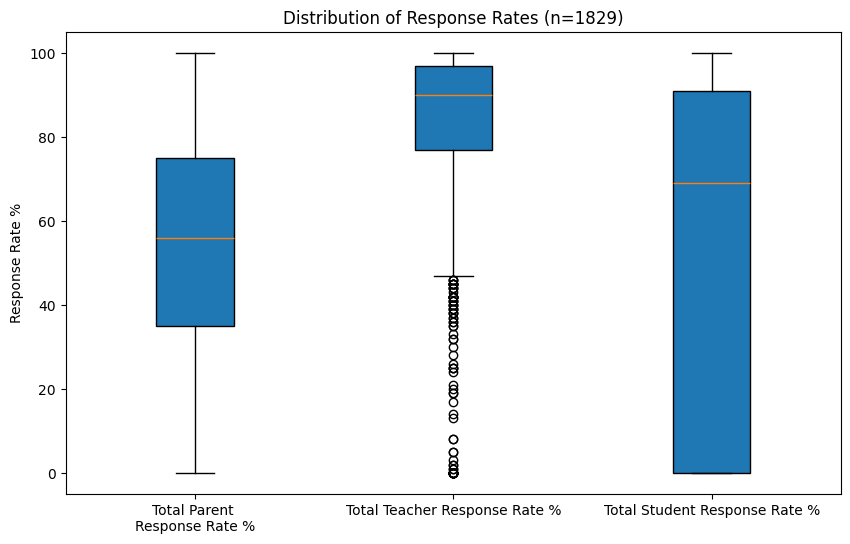

In [59]:
# Plot distribution of response rates
response_columns = ['Total Parent \nResponse Rate %','Total Teacher Response Rate %',
                    'Total Student Response Rate %']
plt.figure(figsize=(10,6))
boxplot = plt.boxplot(data[response_columns].values, vert=True, patch_artist=True, labels=response_columns)

# Customize Plot
plt.title("Distribution of Response Rates (n=1829)")
plt.ylabel("Response Rate %")
plt.show()

In [60]:
data[response_columns].describe()

,Total Parent \nResponse Rate %,Total Teacher Response Rate %,Total Student Response Rate %
count,1829.000000,1829.000000,1829.000000
mean,55.054128,83.895025,49.476217
std,25.398569,18.964205,43.124332
min,0.000000,0.000000,0.000000
25%,35.000000,77.000000,0.000000
50%,56.000000,90.000000,69.000000
75%,75.000000,97.000000,91.000000
max,100.000000,100.000000,100.000000


In [63]:
# Calculate the outliers and number of outliers for the 'Total Teacher Response Rate %' column
Q1 = data['Total Teacher Response Rate %'].quantile(0.25)  # 25th percentile
Q3 = data['Total Teacher Response Rate %'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Total Teacher Response Rate %'] < lower_bound) | 
              (data['Total Teacher Response Rate %'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'Total Teacher Response Rate %': {num_outliers}")
print("Outlier values:", outliers['Total Teacher Response Rate %'].tolist())

Number of outliers in 'Total Teacher Response Rate %': 86
Outlier values: [45, 26, 36, 33, 35, 46, 41, 40, 39, 30, 32, 42, 37, 42, 45, 40, 38, 25, 39, 21, 46, 19, 41, 45, 44, 45, 43, 42, 35, 37, 45, 38, 38, 40, 45, 25, 19, 41, 8, 0, 5, 1, 32, 42, 25, 0, 2, 0, 0, 0, 3, 17, 13, 2, 42, 0, 0, 42, 0, 0, 28, 0, 0, 0, 20, 1, 0, 39, 0, 44, 14, 36, 0, 0, 8, 0, 5, 44, 0, 42, 0, 0, 0, 24, 0, 46]


According to the boxplots above, the median response rate is highest for teachers and lowest for parents. 

The minimum total parent response rate is 0% and the maximum is 100%. This means some schools have 0% of the parents answering the school survey and some schools have 100% of the parents answering. The interquartile range for total parent response rate is 40%. This means there is a fair distribution between low and high parent response rate.

The minimum and maximum teacher response is also 0% and 100%, respectively. However, examining this boxplot, many low response rates are considered outliers. This means most schools have high teacher response rate. 

There were many unreported values (or NaN) for the column, Total Student Response Rate (%). One explanation could be that some schools required students to respond, while others did not. In this study, if the school does not have a student response rate, the response rate is considered 0%. Due to the significant number of 0% student response rates, the mean and first quartile for total student response (%) are both 0%. The distribution of total student response rate is very large, with a interquartile range of 91%. The median student response rate is 69%. 

As for the mean, the average total response rate is highest for teachers and lowest for students. 

#### Scores

In [76]:
scores = ['Collaborative Teachers Score', 'Effective School Leadership Score', 
          'Rigorous Instruction Score','Strong Family-Community Ties Score'] 
data[scores].describe()

,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Strong Family-Community Ties Score
count,1625.000000,1625.000000,1625.000000,1610.000000
mean,3.672098,3.614788,3.588117,3.736845
std,0.652405,0.606924,0.702188,0.636352
min,1.000000,1.140000,1.550000,1.000000
25%,3.240000,3.250000,3.110000,3.420000
50%,3.690000,3.640000,3.600000,3.840000
75%,4.170000,4.020000,4.070000,4.180000
max,4.990000,4.990000,4.990000,4.990000


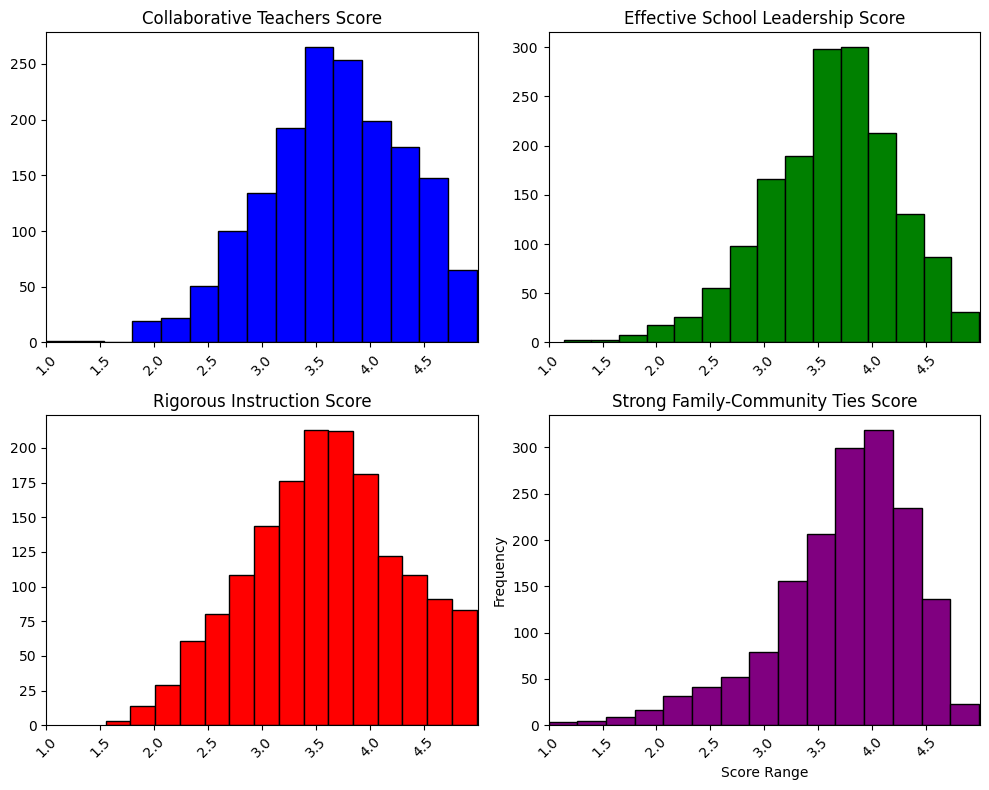

In [93]:
# Create a 2x2 grid of histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#colors
colors = ['blue', 'green', 'red', 'purple']

# Plot histograms and set tick marks
for i, column in enumerate(data[scores].columns):
    row, col = divmod(i, 2)  # Convert index to 2D grid position

    axes[row, col].hist(data[column], bins=15, color=colors[i], edgecolor='black') 
    axes[row, col].set_title(column)
    axes[row, col].set_xlim(1, 5)  # Set x-axis range
    axes[row, col].set_xticks(np.arange(1, 5, 0.5))  # play around with intervals

    # Rotate x-axis tick labels by 45 degrees
    plt.setp(axes[row, col].xaxis.get_majorticklabels(), rotation=45)
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The histograms above display a mostly symmetric, unimodal distribution. However, the histogram for the Strong Family-Community Ties Score shows a more pronounced left skew compared to the others. The scores most frequently fell between 3.5 and 4.0 in all four histograms. 

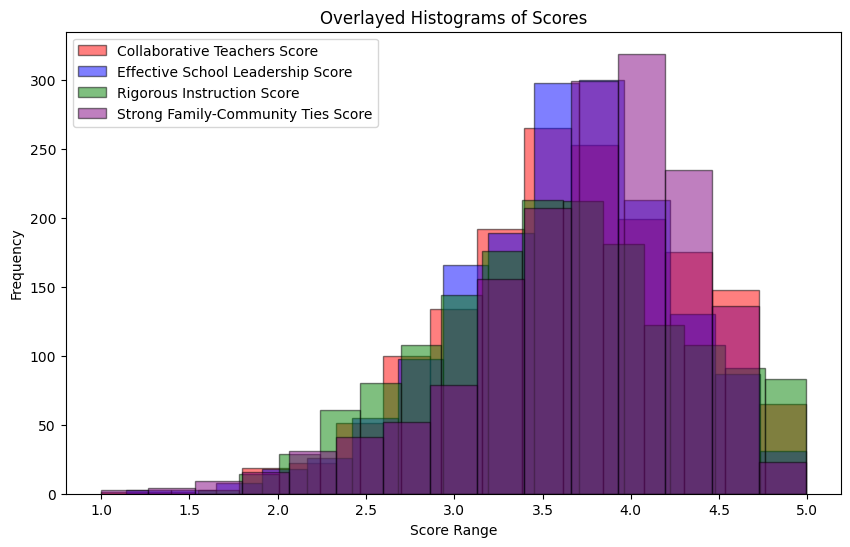

In [97]:
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'purple']

# Overlay the 4 histograms
for i, column in enumerate(data[scores].columns):
    plt.hist(data[column], bins=15, color=colors[i], edgecolor='black', alpha=0.5, label=column)

# Add title and legend
plt.title("Overlayed Histograms of Scores")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

Summary of Findings & Interpretations: 
* Most NYC school teachers completed the survey for their school. According to the boxplot, low teacher response rate were outliers.
* Many schools had about a 50% response rate from parents, resulting in a median of 56% and a mean of 55%. 
* 720 out of the 1829 schools did not have students complete the survey. Still, the median of the total student response rate was 69%, which indicates that response rate was high in schools that did require students to complete the survey.
* Most scores (Collaborative Teacher, Effective Leadership, Rigorous Instruction, Strong Family-Community connection) had a symmetric distribution with a very slight left-skew around 3.6-3.8. This enforces that most scores were in the upper range, but there is a greater variation in score ranges for lower scores. 
* The average scores for all categories were around 3.6-3.7, with the mean just slightly lower than the median.
* Overall Interpretation of Scores: </br>
There seems to be a consistent perception of strong performance across these four areas, but there may be some room for improvement. Most respondants perceive the school as performing slightly above average across all four categories.